# NLP: Visualize different stemming and lemmatizing options

## Imports

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.utils.extmath import randomized_svd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Functions

In [2]:
def svd_km_plot(vectorizer, data, n_components=400, n_clusters=20, title=''):
    
    vecs = vectorizer.fit_transform(data)
    
    U, Sigma, VT = randomized_svd(vecs, n_components = n_components, n_iter = 5)

    km = KMeans(n_clusters = n_clusters, random_state = 42)
    km.fit(np.dot(U, np.diag(Sigma)))

    # predict one cluster per document
    predicted_cluster = km.predict(np.dot(U, np.diag(Sigma)))

    df = pd.DataFrame(U[:,0:2], columns = ['first_feat', 'second_feat'])
    df['cluster'] = predicted_cluster

    sns.lmplot(x='first_feat', y='second_feat', hue='cluster', data=df, fit_reg=False, scatter_kws={'alpha':0.3}, size=10)
    sns.plt.title(title, size=16)

## Load Data

In [3]:
df = pd.read_csv('news_articles_stemmed_lemmatized.csv')

In [4]:
df.sample(3)

,article_text,datetime,source,title,url,cleaned_article_text,article_text_extra_stops,text_lancaster,text_porter,text_snowball,text_lemmatize
52305,* Nikkei regains ground lost on profit-taking ...,2012-10-31,Reuters,Nikkei rebounds after hitting two-week low on ...,http://uk.reuters.com/article/markets-japan-st...,Japan Nikkei share average jumped percent Wedn...,Japan Nikkei jumped like Komatsu_Ltd maintaine...,jap nikke jump lik komatsu_ltd maintain their_...,japan nikkei jump like komatsu_ltd maintain th...,japan nikkei jump like komatsu_ltd maintain th...,Japan Nikkei jumped like Komatsu_Ltd maintaine...
44546,* Nikkei falls 0.6 pct\n * Nippon Sheet Glass...,2012-04-19,Reuters,"Japan's Nikkei retreats, but easing yen supports",http://uk.reuters.com/article/markets-japan-st...,Japan Nikkei share average eased Thursday morn...,Japan Nikkei eased morning session giving back...,jap nikke eas morn sess giv back prevy sess we...,japan nikkei eas morn session give back previo...,japan nikkei eas morn session give back previo...,Japan Nikkei eased morning session giving back...
64733,"(Adds company news) LONDON, Sept 9 (Reuters) -...",2015-09-09 00:00:00,Reuters,UPDATE 2-UK Stocks-Factors to watch on Wednesd...,http://uk.reuters.com/article/markets-factors-...,Britain FTSE index seen opening higher Wednesd...,Britain FTSE seen opening futures ahead cash o...,britain ftse seen op fut ahead cash op for fac...,britain ftse seen open futur ahead cash open f...,britain ftse seen open futur ahead cash open f...,Britain FTSE seen opening future ahead cash op...


## Visualize Clusters

In [5]:
s_df = df.sample(20000)

### Create lists of text

In [6]:
original = s_df['article_text'].tolist()
cleaned = s_df['cleaned_article_text'].tolist()
cleaned_extra_stops = s_df['article_text_extra_stops'].tolist()
porter = s_df['text_porter'].tolist()
lancaster = s_df['text_lancaster'].tolist()
snowball = s_df['text_snowball'].tolist()
lemmatize = s_df['text_lemmatize'].tolist()

### Original text

#### Count Vectorizer

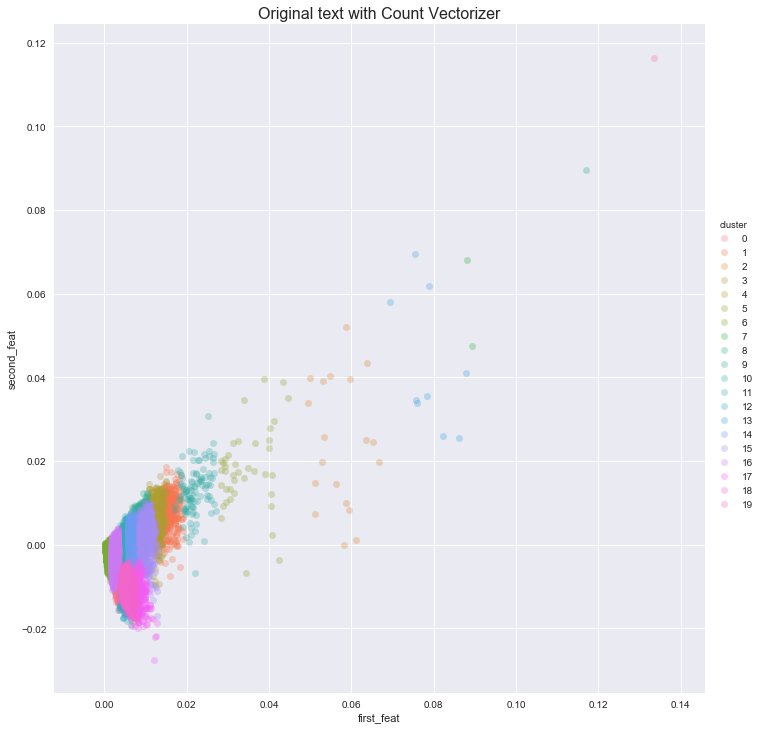

In [7]:
svd_km_plot(CountVectorizer(), original, 400, 20, 'Original text with Count Vectorizer')

#### Binary Count Vectorizer

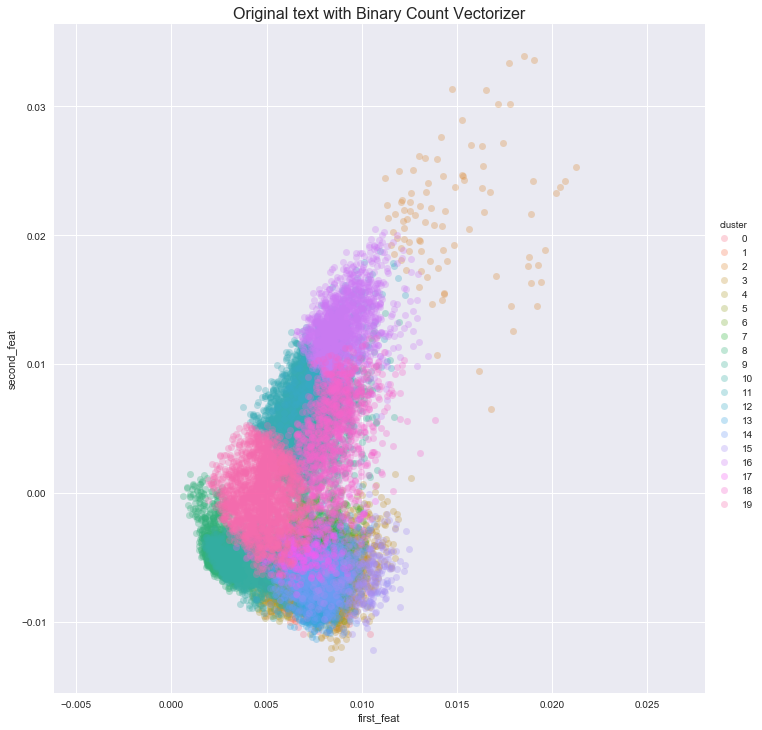

In [8]:
svd_km_plot(CountVectorizer(binary=True), original, 400, 20, 'Original text with Binary Count Vectorizer')

#### TF-IDF

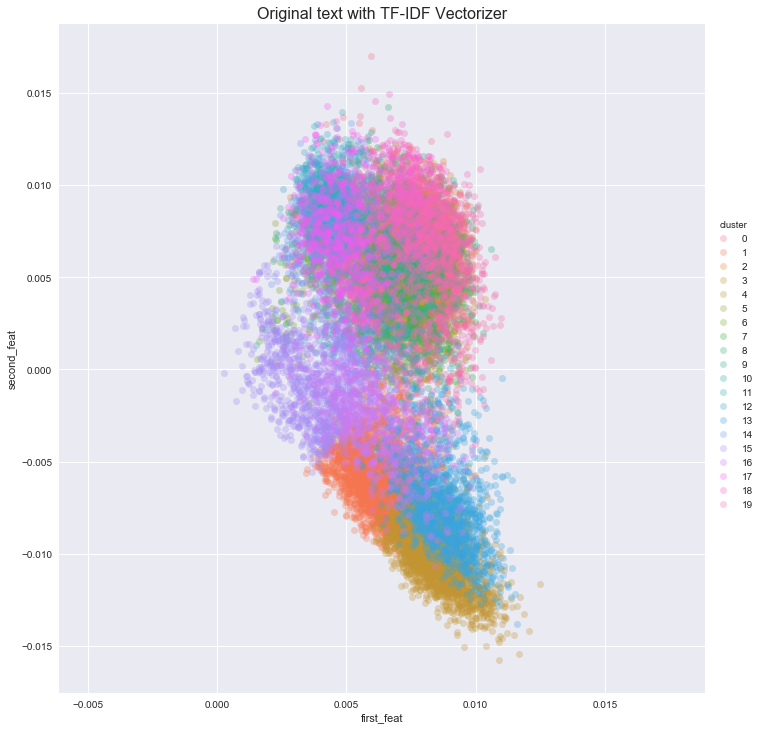

In [9]:
svd_km_plot(TfidfVectorizer(), original, 400, 20, 'Original text with TF-IDF Vectorizer')

### Cleaned text (stop word, punctuation removal)

#### Count Vectorizer

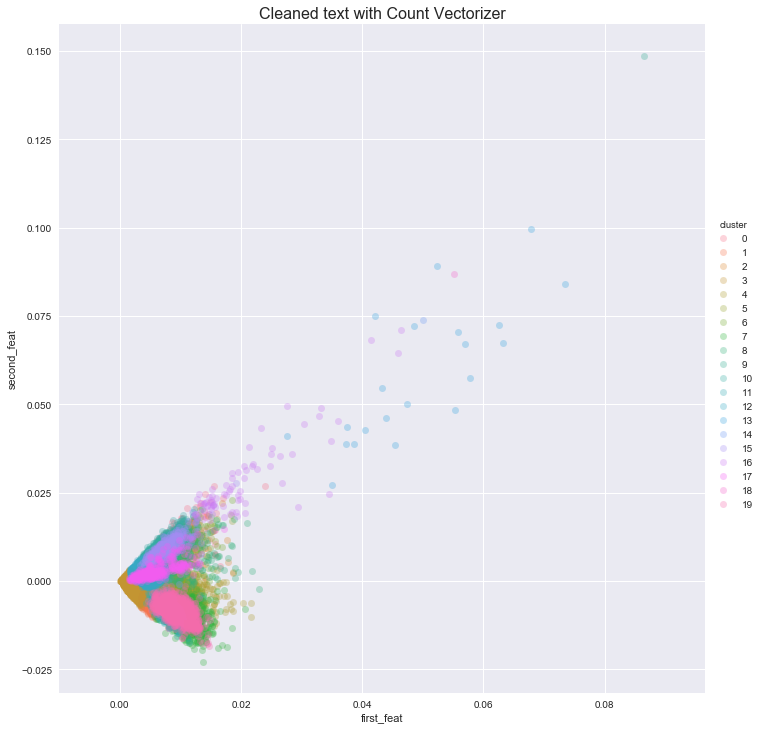

In [10]:
svd_km_plot(CountVectorizer(), cleaned, 400, 20, 'Cleaned text with Count Vectorizer')

#### Binary Count Vectorizer

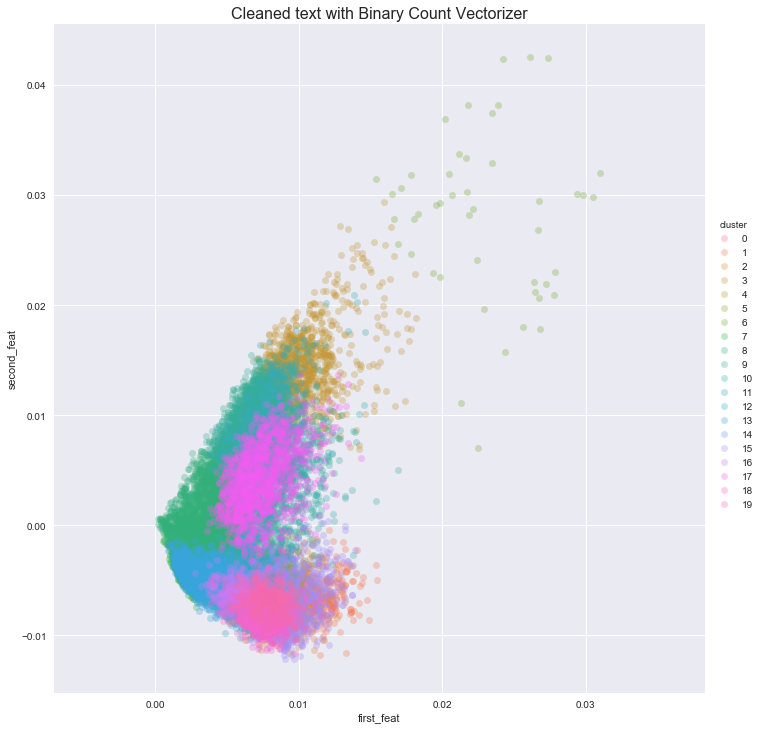

In [11]:
svd_km_plot(CountVectorizer(binary=True), cleaned, 400, 20, 'Cleaned text with Binary Count Vectorizer')

#### TF-IDF

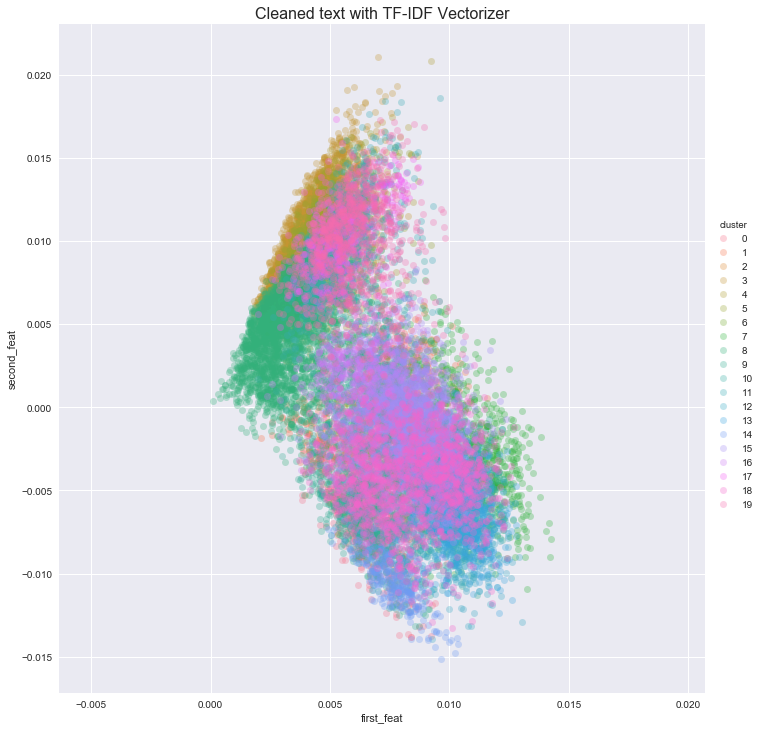

In [12]:
svd_km_plot(TfidfVectorizer(), cleaned, 400, 20, 'Cleaned text with TF-IDF Vectorizer')

### Cleaned text with additional stop words removed

#### Count Vectorizer

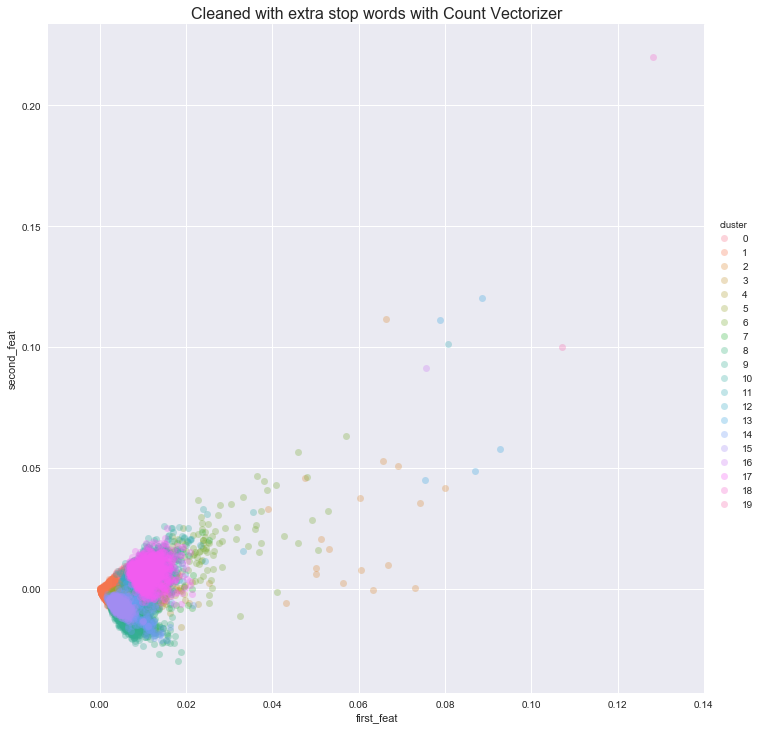

In [13]:
svd_km_plot(CountVectorizer(), cleaned_extra_stops, 400, 20, 'Cleaned with extra stop words with Count Vectorizer')

#### Binary Count Vectorizer

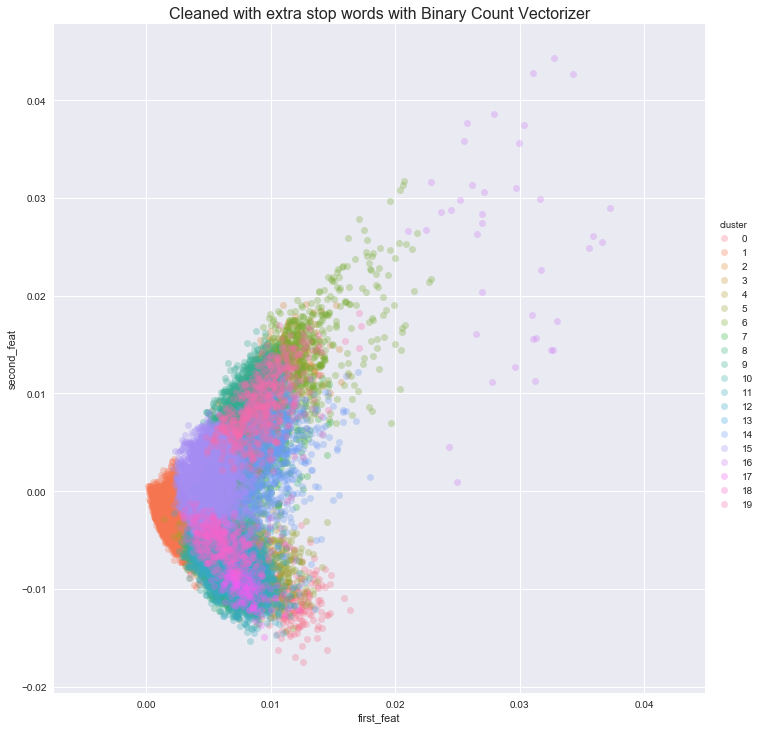

In [14]:
svd_km_plot(CountVectorizer(binary=True), cleaned_extra_stops, 400, 20, 'Cleaned with extra stop words with Binary Count Vectorizer')

#### TF-IDF

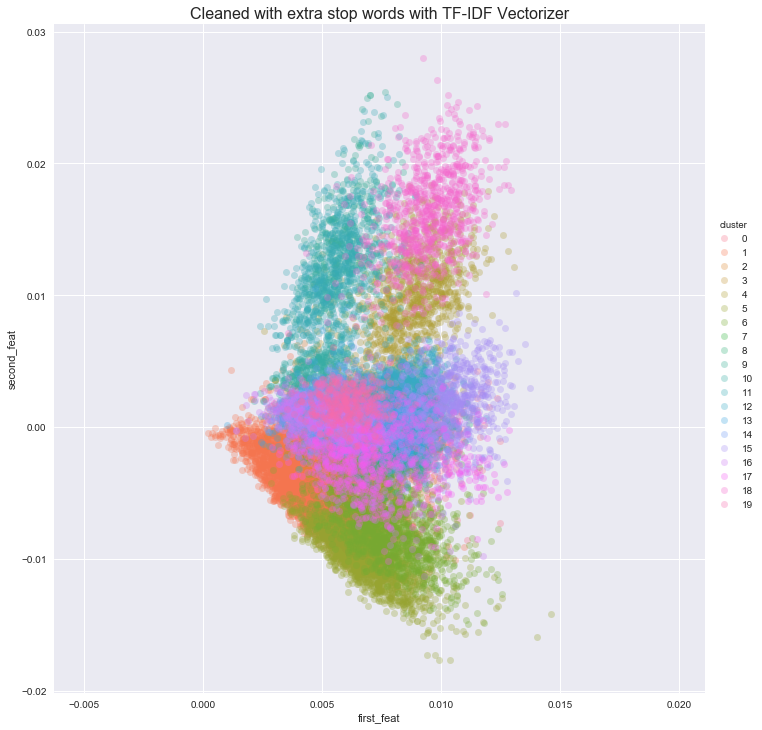

In [15]:
svd_km_plot(TfidfVectorizer(), cleaned_extra_stops, 400, 20, 'Cleaned with extra stop words with TF-IDF Vectorizer')

### Porter stemmer

#### Count Vectorizer

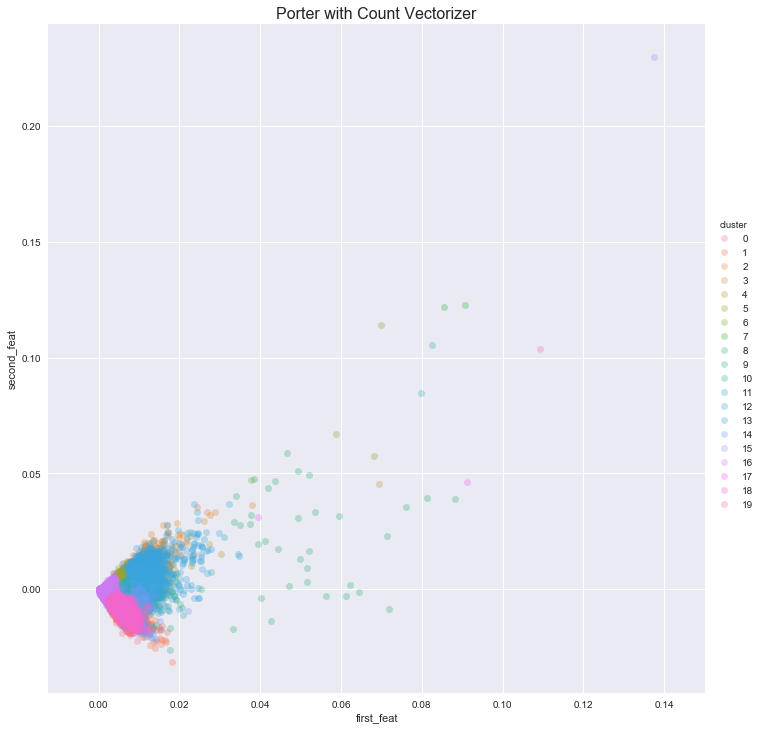

In [16]:
svd_km_plot(CountVectorizer(), porter, 400, 20, 'Porter with Count Vectorizer')

#### Binary Count Vectorizer

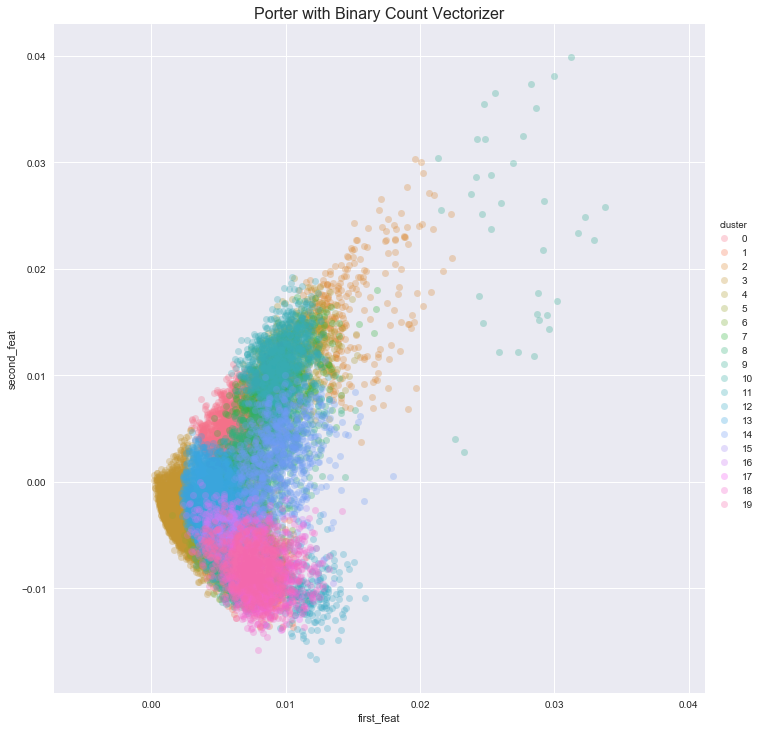

In [17]:
svd_km_plot(CountVectorizer(binary=True), porter, 400, 20, 'Porter with Binary Count Vectorizer')

#### TF-IDF

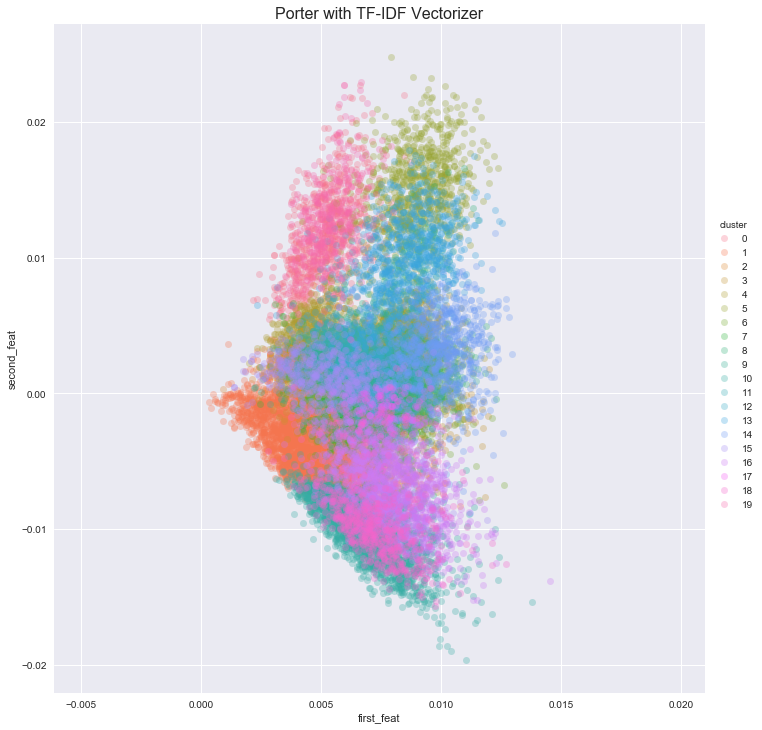

In [18]:
svd_km_plot(TfidfVectorizer(), porter, 400, 20, 'Porter with TF-IDF Vectorizer')

### Lancaster Stemmer

#### Count Vectorizer

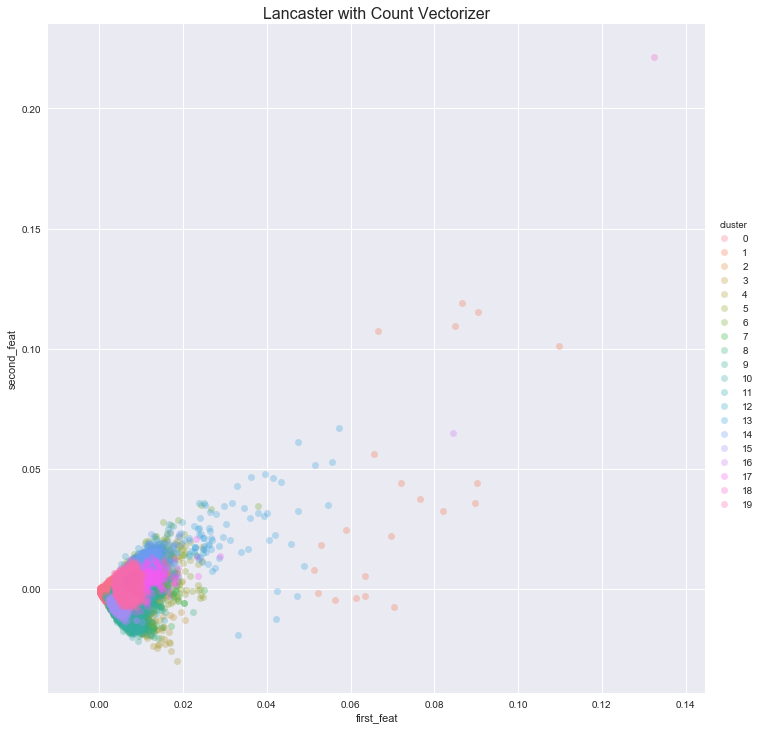

In [19]:
svd_km_plot(CountVectorizer(), lancaster, 400, 20, 'Lancaster with Count Vectorizer')

#### Binary Count Vectorizer

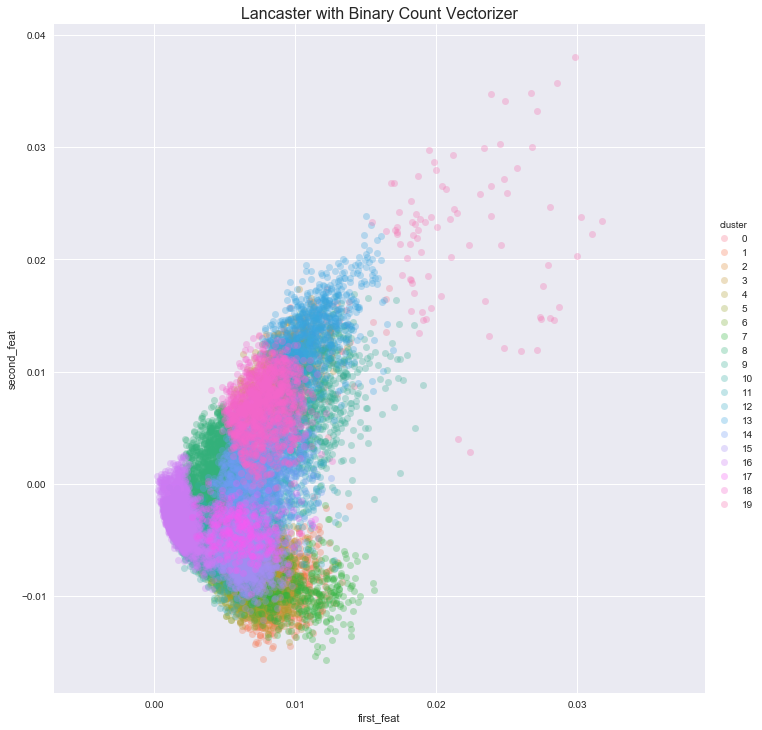

In [20]:
svd_km_plot(CountVectorizer(binary=True), lancaster, 400, 20, 'Lancaster with Binary Count Vectorizer')

#### TF-IDF

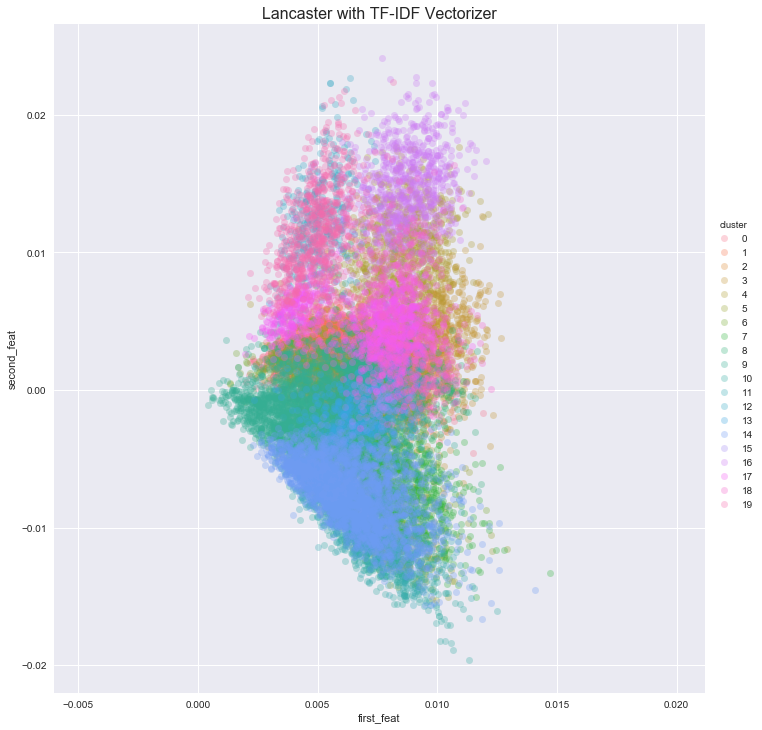

In [21]:
svd_km_plot(TfidfVectorizer(), lancaster, 400, 20, 'Lancaster with TF-IDF Vectorizer')

### Snowball Stemmer

#### Count Vectorizer

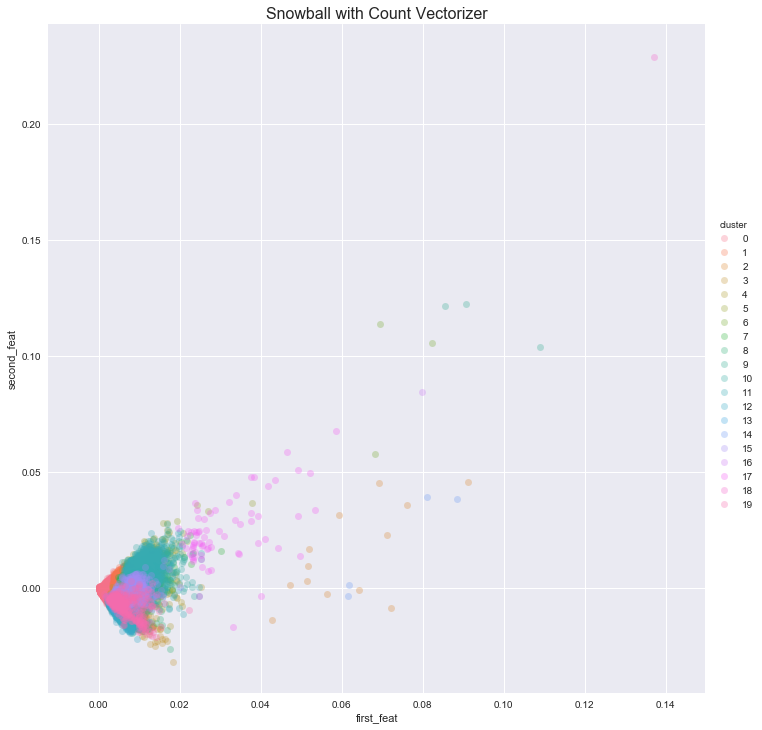

In [22]:
svd_km_plot(CountVectorizer(), snowball, 400, 20, 'Snowball with Count Vectorizer')

#### Binary Count Vectorizer

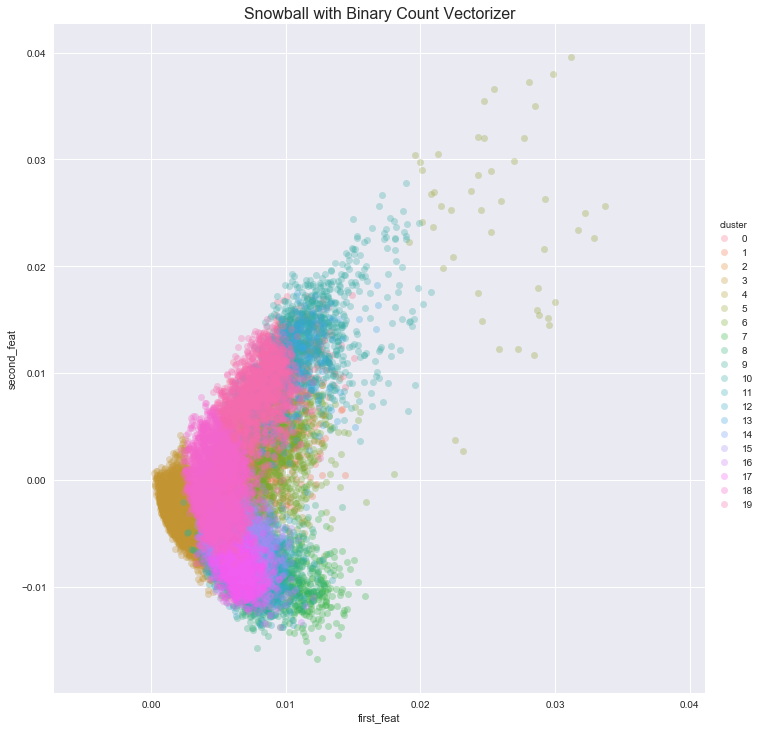

In [23]:
svd_km_plot(CountVectorizer(binary=True), snowball, 400, 20, 'Snowball with Binary Count Vectorizer')

#### TF-IDF

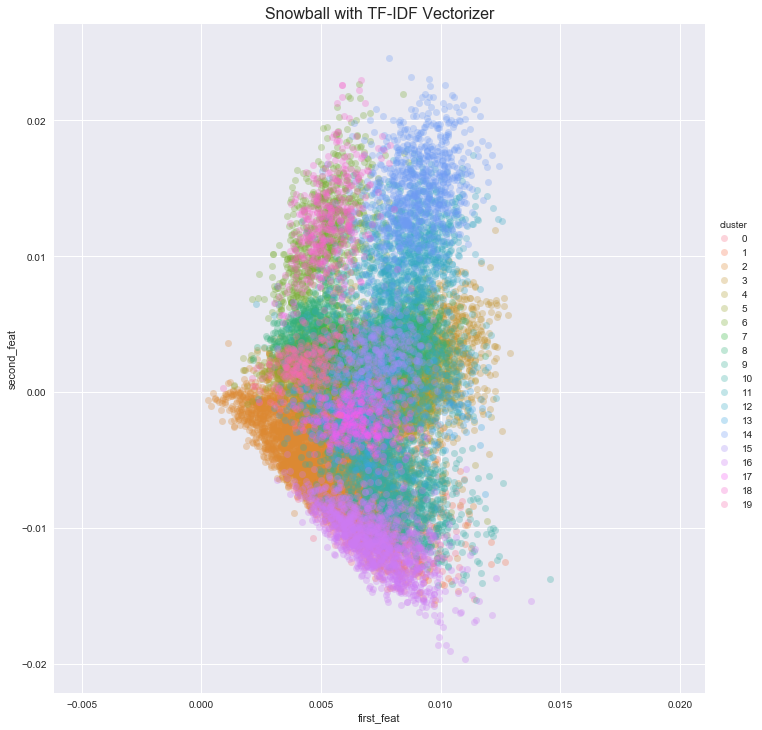

In [24]:
svd_km_plot(TfidfVectorizer(), snowball, 400, 20, 'Snowball with TF-IDF Vectorizer')

### Lemmatizer

#### Count Vectorizer

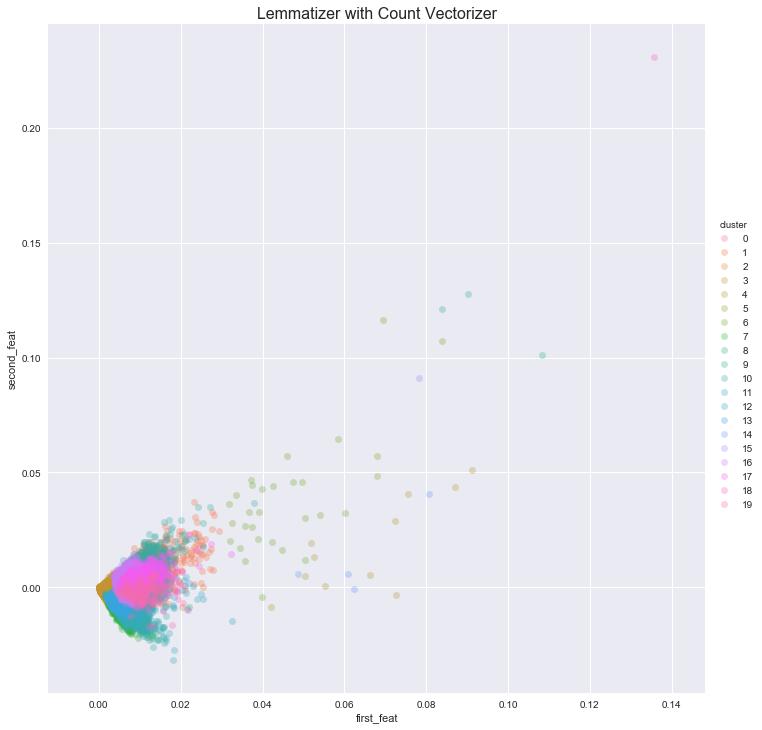

In [25]:
svd_km_plot(CountVectorizer(), lemmatize, 400, 20, 'Lemmatizer with Count Vectorizer')

#### Binary Count Vectorizer

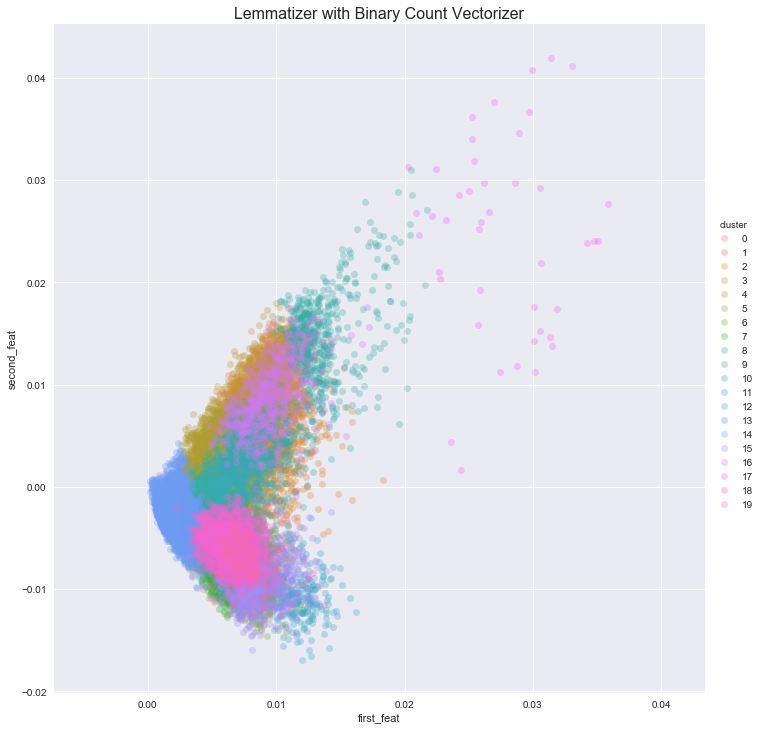

In [26]:
svd_km_plot(CountVectorizer(binary=True), lemmatize, 400, 20, 'Lemmatizer with Binary Count Vectorizer')

#### TF-IDF

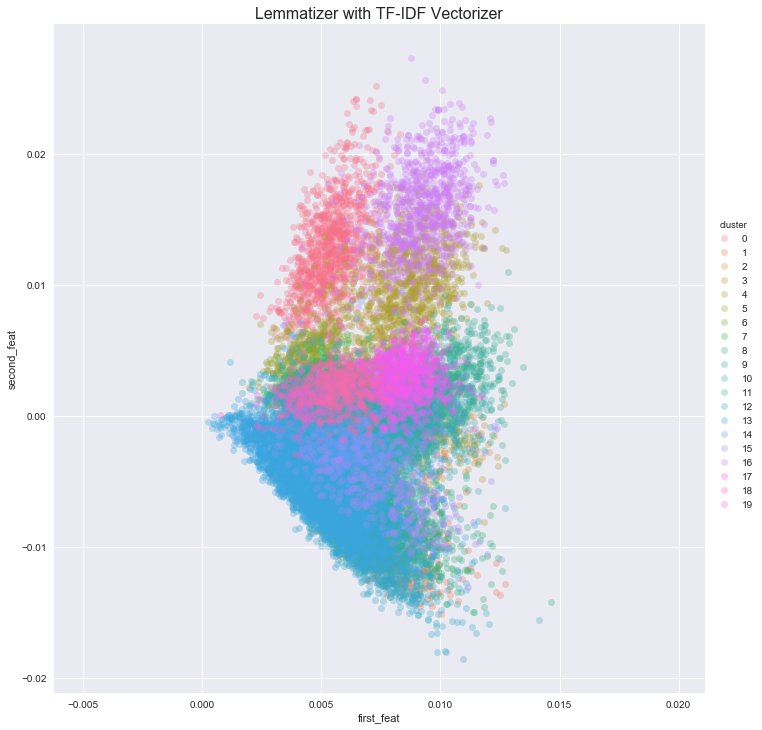

In [27]:
svd_km_plot(TfidfVectorizer(), lemmatize, 400, 20, 'Lemmatizer with TF-IDF Vectorizer')

## Thoughts

Some interesting cluster patterns in the charts. It seems that a simple count vectorizer isn't that great, but a binary count or TF-IDF does a better job. I will still need to explore altering different parameters such as minimum and maximum document frequency.

It's hard to say at this point what kind of stemming or lemmatizing does the best job; these visualisations are only plotting the first two latent features from an SVD and with K-Means so there is a lot more exploration to be done.

Because I'm doing topic modelling, I think that ultumately it will come down to examining the articles that get placed into each topic cluster rather than relying on quantitative measures or charts.